In [1]:
import defs
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from scipy import constants
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('/Users/max/HiPACE/hipace/tools/')
import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 16
plt.style.use('classic')

n = 'none'
b = 'behind'
f = 'front'

none = defs.Functions(path = f'/Users/max/HiPACE/recovery/uniform/h5/{n}/', insitu_path = f'/Users/max/HiPACE/recovery/uniform/insitu/{n}/', n0 = 7.8e15, iteration = 0, normalized = True, recovery = False)
behind = defs.Functions(path = f'/Users/max/HiPACE/recovery/uniform/h5/{b}/', insitu_path = f'/Users/max/HiPACE/recovery/uniform/insitu/{b}/', n0 = 7.8e15, iteration = 0, normalized = True, recovery = True)
front = defs.Functions(path = f'/Users/max/HiPACE/recovery/uniform/h5/{f}/', insitu_path = f'/Users/max/HiPACE/recovery/uniform/insitu/{f}/', n0 = 7.8e15, iteration = 0, normalized = True, recovery = True)

IA = constants.m_e * constants.c**3 / constants.e

none.customCMAP()

In [2]:
print(f'No Recovery : {none.quickEfficiency(iteration = none.iteration):.2f} %\nBehind : {behind.quickEfficiency(iteration = behind.iteration):.2f} %\nFront : {front.quickEfficiency(iteration = front.iteration):.2f} %')

No Recovery : 25.89 %
Behind : 44.95 %
Front : 73.46 %


In [3]:
print(f'nDrive {diag.total_charge(none.driveInsitu)[0]:.3e}\tnWitness {diag.total_charge(none.witnessInsitu)[0]:.3e}\nbDrive {diag.total_charge(behind.driveInsitu)[0]:.3e}\tbWitness {diag.total_charge(behind.witnessInsitu)[0]:.3e}\tbRecovery {diag.total_charge(behind.recoveryInsitu)[0]:.3e}\nfDrive {diag.total_charge(front.driveInsitu)[0]:.3e}\tfWitness {diag.total_charge(front.witnessInsitu)[0]:.3e}\tfRecovery {diag.total_charge(front.recoveryInsitu)[0]:.3e}')

nDrive -5.340e-10	nWitness 1.020e-10
bDrive -5.340e-10	bWitness 1.020e-10	bRecovery -3.096e-10
fDrive -5.340e-10	fWitness 6.282e-11	fRecovery -1.769e-10


In [13]:
front.info.z[front.maskW][-1] * front.kp

-5.26904296875

In [4]:
behind.emittance(sigma_x=3.e-6, sigma_ux=2.5, normalized=False)

7.5e-06

In [15]:
front.ux(8e-6, 3.e-6, False)

2.6666666666666665

In [6]:
np.mean([diag.emittance_x(behind.recoveryInsitu['average'])[0], diag.emittance_y(behind.recoveryInsitu['average'])[0]]) * 1e6 # µm rad

7.505452699369512

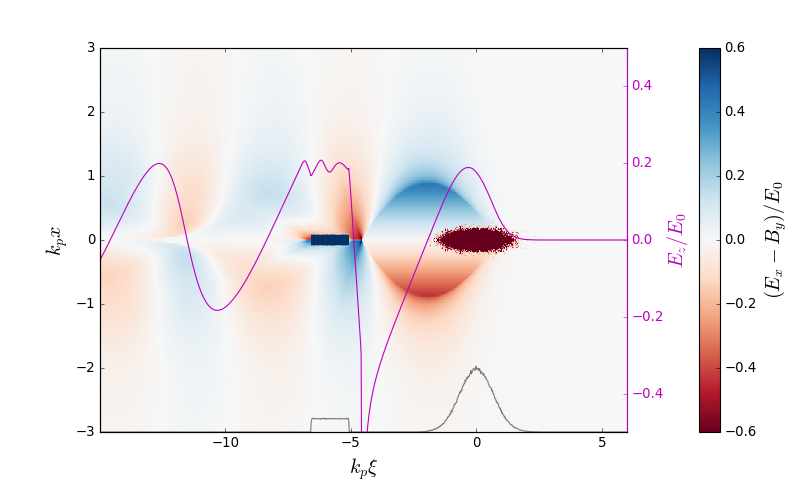

In [23]:
s = .6
col = 'm'
pd = .9
prfl = 'k'

plt.close()
fig, axs = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 6)) # , gridspec_kw={'width_ratios': [1.75, 1]})
# plt.subplots_adjust(hspace=0.075)

imNone = axs.pcolormesh(none.kp * none.info.z, none.kp * none.info.x, none.ExmBy.T / none.E0, cmap = 'RdBu', vmin = -s, vmax = s)
axs.pcolormesh(none.kp * none.info.z, none.kp * none.info.x, none.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
axs.plot(none.kp * none.info.z, .5e3 * none.profile[none.iteration] - 3, prfl, alpha = .5)
# axs.plot(none.kp * none.info.z, .75 * none.profile / max(none.profile) - 3, prfl, alpha = .5)
# axs[0].plot(none.info.z[none.maskD], 1.5 * none.nD / max(none.nD) - 6, 'b', alpha = 1)
# axs[0].plot(none.info.z[none.maskW], 1.5 * none.nW / max(none.nW) - 6, 'b', alpha = 1)
ax2 = axs.twinx()
ax2.plot(none.kp * none.info.z, none.Ez / none.E0, color = col)
ax2.set_ylim(-.5, .5)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1, fontsize = 18, color = col)
ax2.spines["right"].set_color(col)
# ax2.spines["left"].set_visible(False)
ax2.tick_params(axis='y', colors=col)
divider2 = make_axes_locatable(axs)
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = pd)
cax3.remove()
cb2 = plt.colorbar(imNone, cax = cax2)
cb2.set_label(r'$(E_x - B_y)/E_0 $', fontsize = 18)

axs.set_xlim(none.kp * none.info.zmin, none.kp * none.info.zmax)
axs.set_xlabel(r'$k_p\xi$', fontsize = 18)


axs.set_ylim(-3, 3)
axs.set_ylabel(r'$k_px$', fontsize = 18)

# labels = ['(a)', '(b)', '(c)']
# for lab, ax in zip(labels, axs.flat):
#     ax.text(0.01, 0.98, lab, transform=ax.transAxes, fontsize=20, verticalalignment='top')

# plt.savefig('/Users/max/HiPACE/recovery/images/uNone.png', dpi = 300, bbox_inches = 'tight')
plt.show()

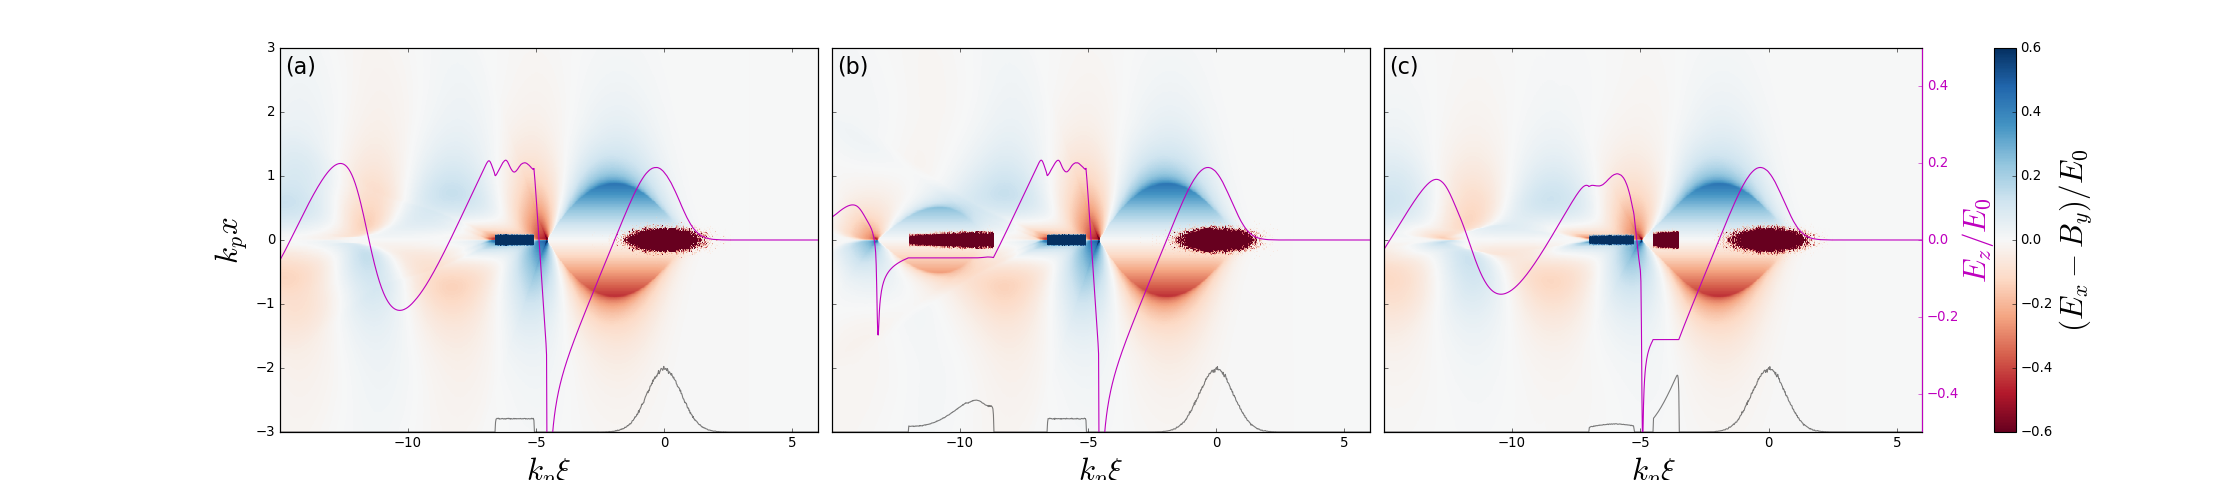

In [25]:
s = .6
col = 'm'
pd = .9
prfl = 'k'

plt.close()
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(28, 6), gridspec_kw={'width_ratios': [1, 1, 1.175]})
plt.subplots_adjust(wspace=0.025)

imNone = axs[0].pcolormesh(none.kp * none.info.z, none.kp * none.info.x, none.ExmBy.T / none.E0, cmap = 'RdBu', vmin = -s, vmax = s)
axs[0].pcolormesh(none.kp * none.info.z, none.kp * none.info.x, none.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
axs[0].plot(none.kp * none.info.z, .5e3 * none.profile[none.iteration] - 3, prfl, alpha = .5)
# axs[0].plot(none.kp * none.info.z, .75 * none.profile / max(none.profile) - 3, prfl, alpha = .5)
ax2 = axs[0].twinx()
ax2.plot(none.kp * none.info.z, none.Ez / none.E0, color = col)
ax2.set_ylim(-.5, .5)
ax2.axes.get_yaxis().set_visible(False)

imBehind = axs[1].pcolormesh(behind.kp * behind.info.z, behind.kp * behind.info.x, behind.ExmBy.T / behind.E0, cmap = 'RdBu', vmin = -s, vmax = s)
axs[1].pcolormesh(behind.kp * behind.info.z, behind.kp * behind.info.x, behind.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
axs[1].plot(behind.kp * behind.info.z, .5e3 * behind.profile[behind.iteration] - 3, prfl, alpha = .5)
# axs[1].plot(behind.kp * behind.info.z, .75 * behind.profile / max(behind.profile) - 3, prfl, alpha = .5)
ax2 = axs[1].twinx()
ax2.plot(behind.kp * behind.info.z, behind.Ez / behind.E0, color = col)
ax2.set_ylim(-.5, .5)
ax2.axes.get_yaxis().set_visible(False)

imFront = axs[2].pcolormesh(front.kp * front.info.z, front.kp * front.info.x, front.ExmBy.T / front.E0, cmap = 'RdBu', vmin = -s, vmax = s)
axs[2].pcolormesh(front.kp * front.info.z, front.kp * front.info.x, front.jz_beam.T, cmap = 'RdBuT', vmin = -1e12, vmax = 1e12)
axs[2].plot(front.kp * front.info.z, .5e3 * front.profile[front.iteration] - 3, prfl, alpha = .5)
# axs[2].plot(front.kp * front.info.z, .75 * front.profile / max(front.profile) - 3, prfl, alpha = .5)
ax2 = axs[2].twinx()
ax2.plot(front.kp * front.info.z, front.Ez / front.E0, color = col)
ax2.set_ylim(-.5, .5)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1, fontsize = 28, color = col)
ax2.spines["right"].set_color(col)
# ax2.spines["left"].set_visible(False)
ax2.tick_params(axis='y', colors=col)
divider2 = make_axes_locatable(axs[2])
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = pd)
cax3.remove()
cb2 = plt.colorbar(imFront, cax = cax2)
cb2.set_label(r'$(E_x - B_y)/E_0 $', fontsize = 28)

for ax in axs[:]:
    ax.set_xlim(none.kp * behind.info.zmin, none.kp * behind.info.zmax)
    ax.set_xlabel(r'$k_p\xi$', fontsize = 28)

axs[-1].set_xlim(front.kp * front.info.zmin, front.kp * front.info.zmax)

axs[0].set_ylim(-3, 3)
axs[0].set_ylabel(r'$k_px$', fontsize = 28)

labels = ['(a)', '(b)', '(c)']
for lab, ax in zip(labels, axs.flat):
    ax.text(0.01, 0.98, lab, transform=ax.transAxes, fontsize=20, verticalalignment='top')

# plt.savefig('/Users/max/HiPACE/recovery/images/uniformH.png', dpi = 300, bbox_inches = 'tight')
plt.show()

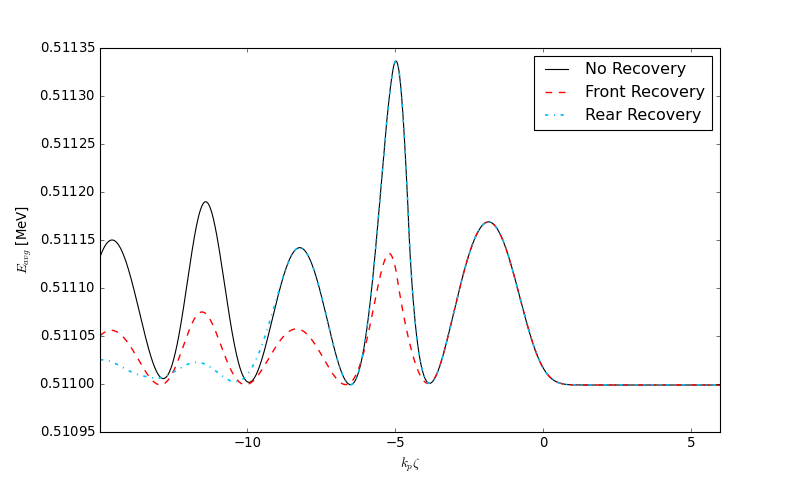

In [8]:
none.electronInsitu = diag.read_file(f'/Users/max/HiPACE/recovery/non-filament/insitu/{n}/reduced_electrons.0000.txt')
front.electronInsitu = diag.read_file(f'/Users/max/HiPACE/recovery/non-filament/insitu/{f}/reduced_electrons.0000.txt')
behind.electronInsitu = diag.read_file(f'/Users/max/HiPACE/recovery/non-filament/insitu/{b}/reduced_electrons.0000.txt')

plt.close()
plt.figure(figsize = (10, 6))
plt.plot(none.kp * none.info.z, 1e-6 * diag.energy_mean_eV(none.electronInsitu, True)[0], label = 'No Recovery', c = 'k', ls = '-')
plt.plot(front.kp * front.info.z, 1e-6 * diag.energy_mean_eV(front.electronInsitu, True)[0], label = 'Front Recovery', c = 'r', ls = '--', alpha = 1, linewidth = 1.25)
plt.plot(behind.kp * behind.info.z, 1e-6 * diag.energy_mean_eV(behind.electronInsitu, True)[0], label = 'Rear Recovery', c = 'deepskyblue', ls = '-.', alpha = 1, linewidth = 1.5)
# plt.vlines(max(front.zr), .5, 1., color = 'gray', linestyle = '--', alpha = .5, label = '_Recovery Head')

ax = plt.gca()
ax.ticklabel_format(axis = 'y', style = 'sci', useMathText=True, useOffset = False)

plt.xlabel('$k_p\zeta$')
plt.ylabel(r'$E_{avg}$ [MeV]')
plt.xlim(behind.kp * behind.info.zmin, behind.kp * behind.info.zmax)
# plt.ylim(.5, 1.)
plt.legend(loc = 'best')
# plt.savefig('/Users/max/HiPACE/recovery/images/nPlasmaEnergy.png', dpi = 300, bbox_inches = 'tight')
plt.show()